In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Informations sur les clients
Genre : Homme ou femme. <br>
SeniorCitizen : Le client est-il un senior ? (1 = Oui, 0 = Non).<br>
Partner : Le client a-t-il un partenaire ? (Oui, Non).<br>
Dependents : Le client a-t-il des personnes à charge ? (Oui, Non).<br>
Tenure : Nombre de mois d’ancienneté du client dans l’entreprise.<br>

## Services souscrits
PhoneService : Le client possède-t-il un service téléphonique ? (Oui, Non).<br>
MultipleLines : Le client a-t-il plusieurs lignes téléphoniques ? (Oui, Non, Pas de service téléphonique).<br>
InternetService : Fournisseur d’accès à Internet du client (DSL, Fibre optique, Aucun).<br>
OnlineSecurity : Le client possède-t-il un service de sécurité en ligne ? (Oui, Non, Pas de service Internet).<br>
OnlineBackup : Le client possède-t-il une sauvegarde en ligne ? (Oui, Non, Pas de service Internet).<br>
DeviceProtection : Le client possède-t-il une protection des appareils ? (Oui, Non, Pas de service Internet).<br>
TechSupport : Le client a-t-il un support technique ? (Oui, Non, Pas de service Internet).<br>
StreamingTV : Le client possède-t-il un service de streaming TV ? (Oui, Non, Pas de service Internet).<br>
StreamingMovies : Le client possède-t-il un service de streaming de films ? (Oui, Non, Pas de service Internet).<br>

## Informations contractuelles
Contract : Type de contrat du client (Mensuel, Un an, Deux ans).<br>
PaperlessBilling : Le client utilise-t-il la facturation électronique ? (Oui, Non).<br>
PaymentMethod : Méthode de paiement du client (Prélèvement automatique bancaire, Carte de crédit automatique, Chèque électronique,<br> Chèque envoyé).<br>

## Facturation et résiliation
MonthlyCharges : Montant facturé mensuellement.<br>
TotalCharges : Montant total facturé.<br>
Churn : Le client a-t-il résilié son abonnement ? (Oui, Non).<br>

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("../Data/raw/Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
# df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


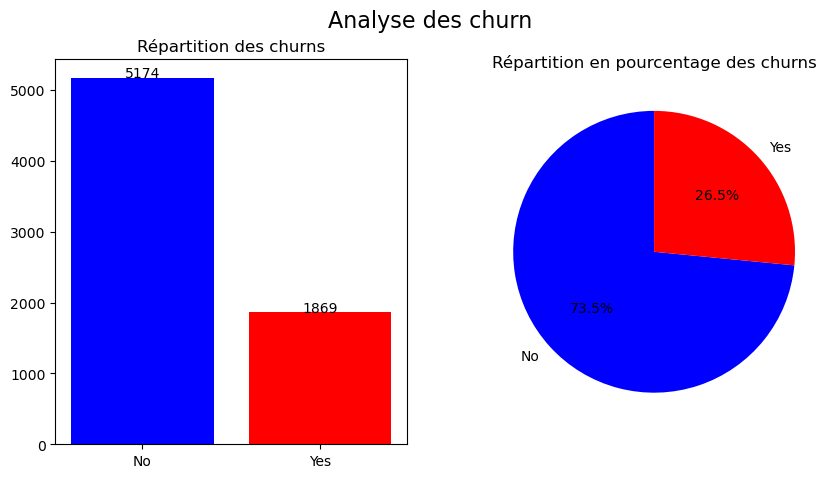

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax.title("Churn Rate")
fig.suptitle("Analyse des churn", fontsize=16)
ax[0].set_title("Répartition des churns")
ax[0].bar(df["Churn"].value_counts().index, df["Churn"].value_counts().values, color=["blue", "red"])
for index, value in enumerate(df["Churn"].value_counts().values):
    ax[0].text(index, value, str(value), ha='center')
ax[1].pie(df["Churn"].value_counts().values, labels=df["Churn"].value_counts().index, autopct='%1.1f%%', startangle=90, colors=["blue", "red"])
ax[1].set_title("Répartition en pourcentage des churns")
plt.savefig("../reports/churn_rate.png")
plt.show()

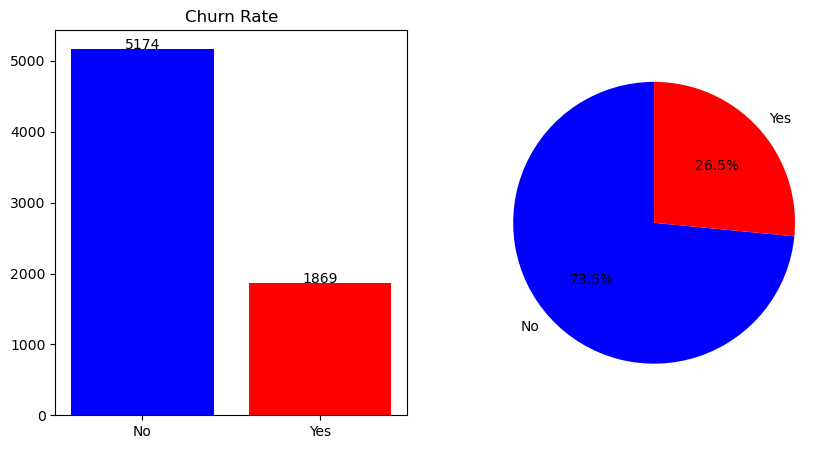

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax.title("Churn Rate")
ax[0].set_title("Churn Rate")
ax[0].bar(df["Churn"].value_counts().index, df["Churn"].value_counts().values, color=["blue", "red"])
for index, value in enumerate(df["Churn"].value_counts().values):
    ax[0].text(index, value, str(value), ha='center')
ax[1].pie(df["Churn"].value_counts().values, labels=df["Churn"].value_counts().index, autopct='%1.1f%%', startangle=90, colors=["blue", "red"])
plt.show()

Observation : <br> on remarque que la variable ciblé est n'est pas equilibré 

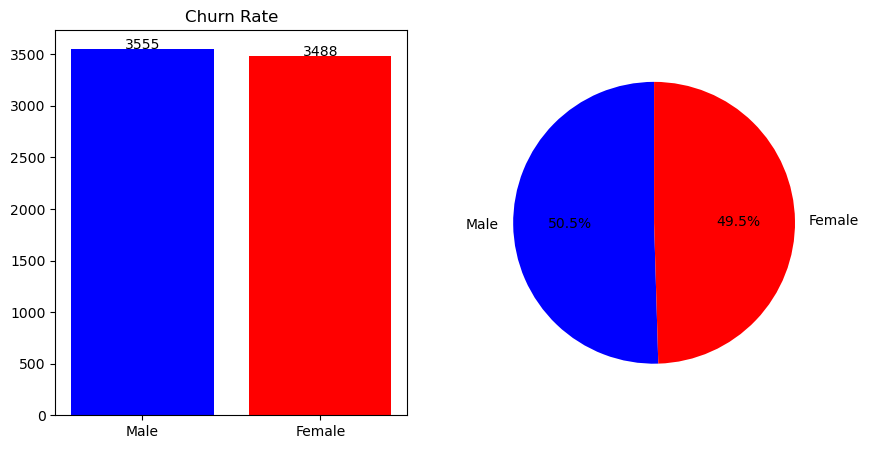

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax.title("Churn Rate")
ax[0].set_title("Churn Rate")
ax[0].bar(df["gender"].value_counts().index, df["gender"].value_counts().values, color=["blue", "red"])
for index, value in enumerate(df["gender"].value_counts().values):
    ax[0].text(index, value, str(value), ha='center')
ax[1].pie(df["gender"].value_counts().values, labels=df["gender"].value_counts().index, autopct='%1.1f%%', startangle=90, colors=["blue", "red"])
plt.show()

<Figure size 800x500 with 0 Axes>

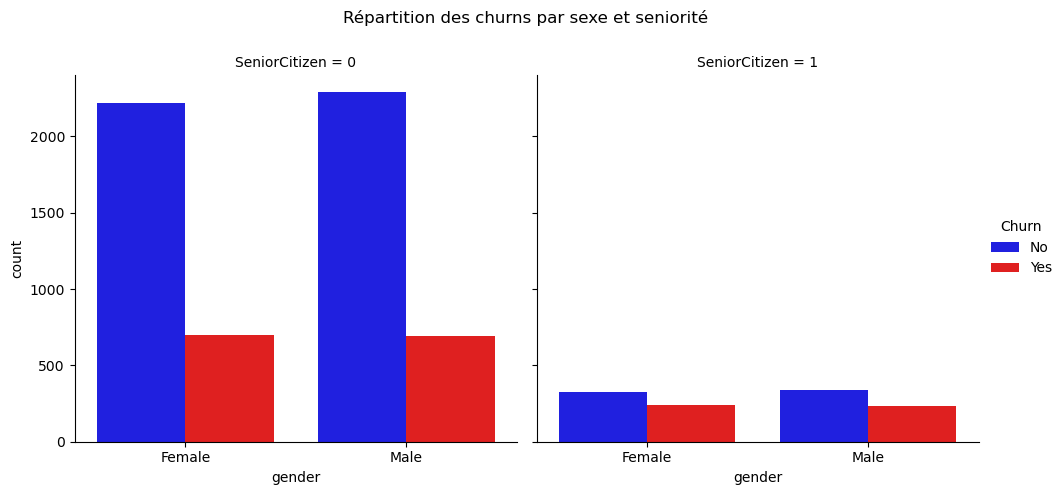

In [11]:
plt.figure(figsize=(8, 5))
sns.catplot(x='gender', hue='Churn', col='SeniorCitizen', data=df, kind='count', palette=["blue", "red"])
plt.suptitle("Répartition des churns par sexe et seniorité")
plt.subplots_adjust(top=0.85)
plt.savefig("../reports/churn_rate_by_age_and_gender.png")
plt.show()

# Observations

Le nombre de seniors est inférieur à celui des non-seniors<br>
La répartition par genre est quasi équilibrée (seniors et non-seniors confondus)<br>
Taux de désabonnement identique entre hommes et femmes<br>

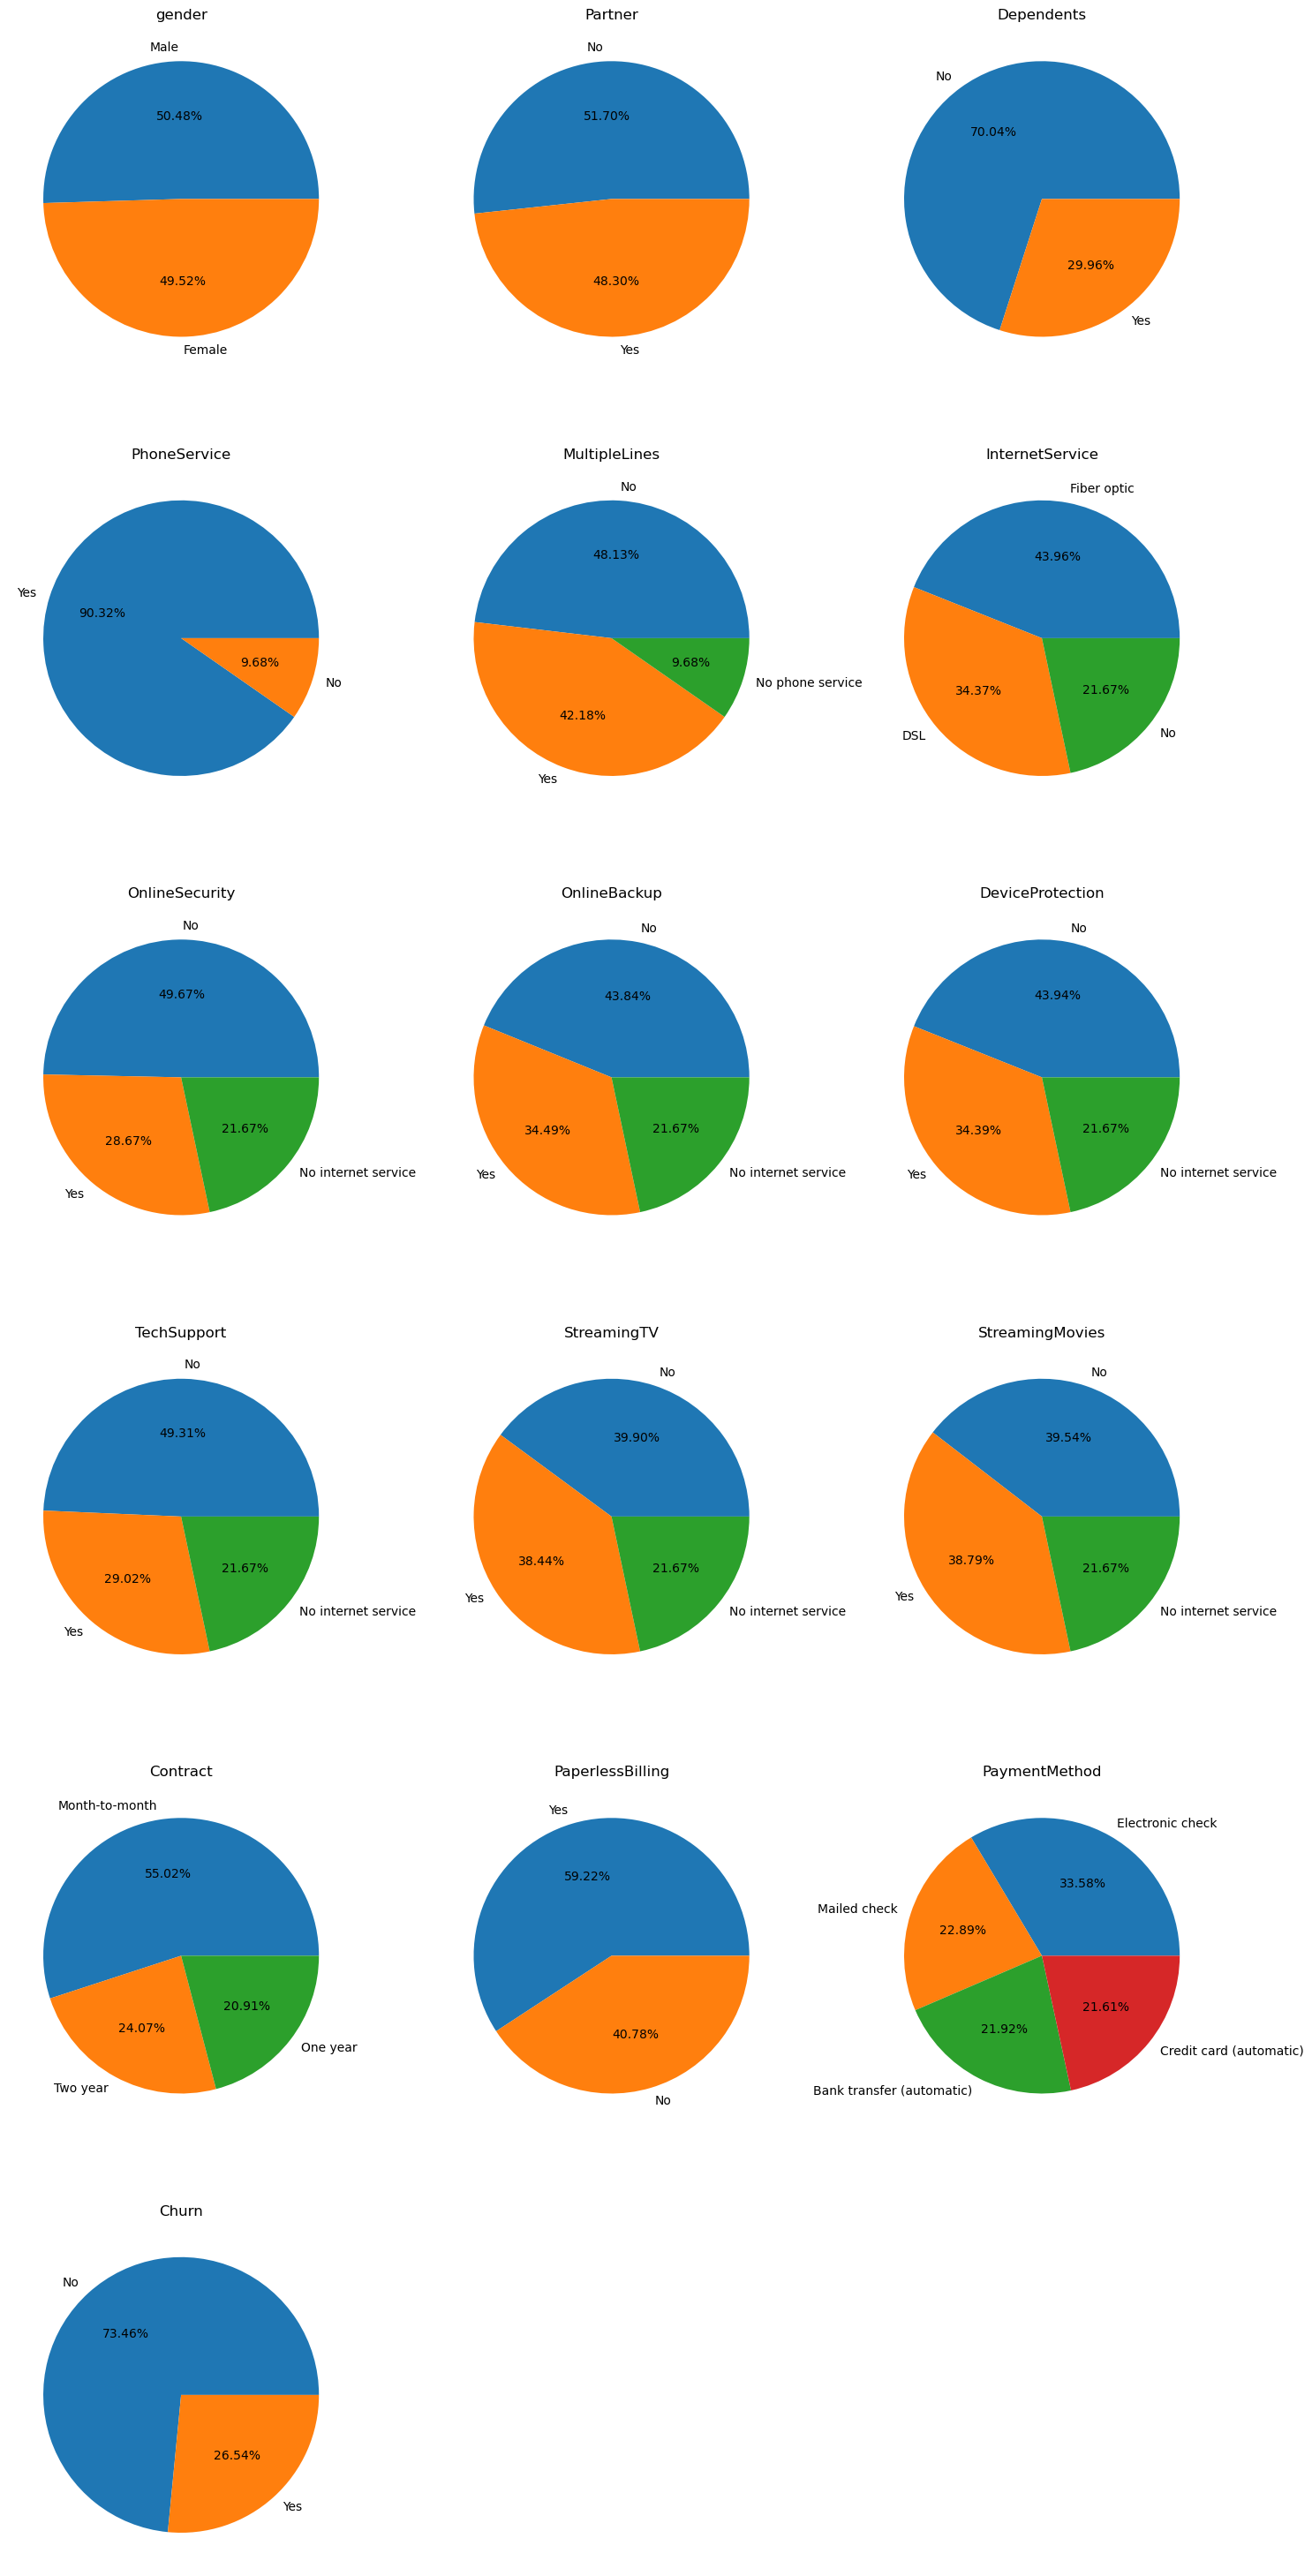

In [12]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O' and col != 'customerID']
n = len(cat_cols)

cols = 3
rows = int(n / cols)+1

plt.figure(figsize=(5 * cols, 5 * rows))

for i, col in enumerate(cat_cols):
    plt.subplot(rows, cols, i+1)

    data = df[col].value_counts().values
    labels = df[col].value_counts().index

    plt.pie(data, labels=labels, autopct='%1.2f%%')
    plt.title(col)

plt.tight_layout()
plt.show()

# observations
Créer une nouvelle colonne binaire pour le service internet (oui/non)<br>
Cette colonne indiquera si le client a un service internet ou non<br>

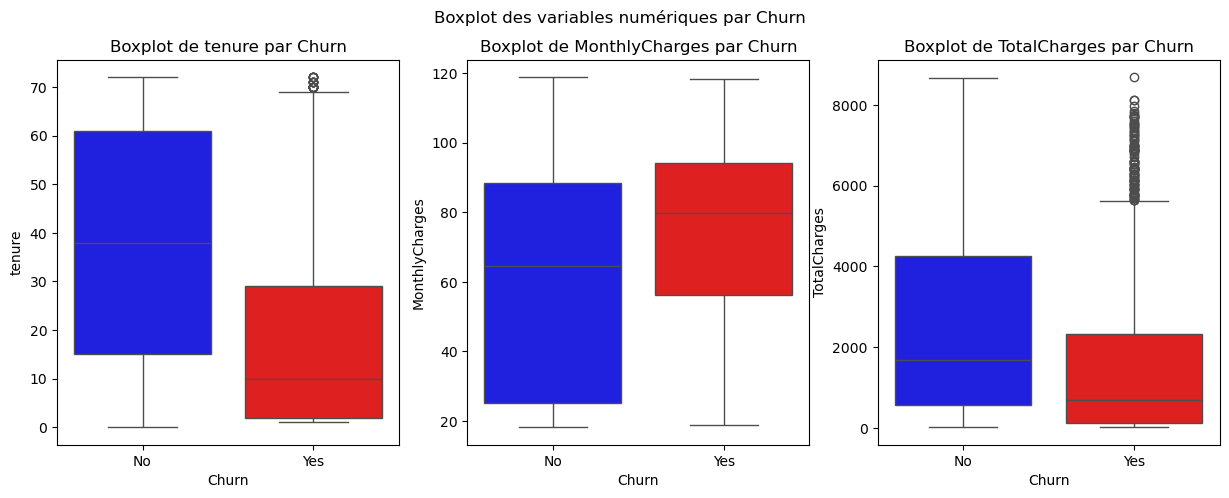

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x='Churn', y=col, ax=ax[i], palette=["blue", "red"], hue='Churn')
    ax[i].set_title(f'Boxplot de {col} par Churn')

plt.suptitle("Boxplot des variables numériques par Churn")
plt.savefig("../reports/boxplot_numeric.png")
plt.show()

# Observation
 
on remarque par le premier boxplot que 50 % des client on resielier leur contrat avant finir leur premiere année avec l'operateur <br>
on remarque que les charges mensuelle des client résilé sont elevé par rapport au client non résilé ce que peut nous donner des indices sur la cause de resiliation <br>


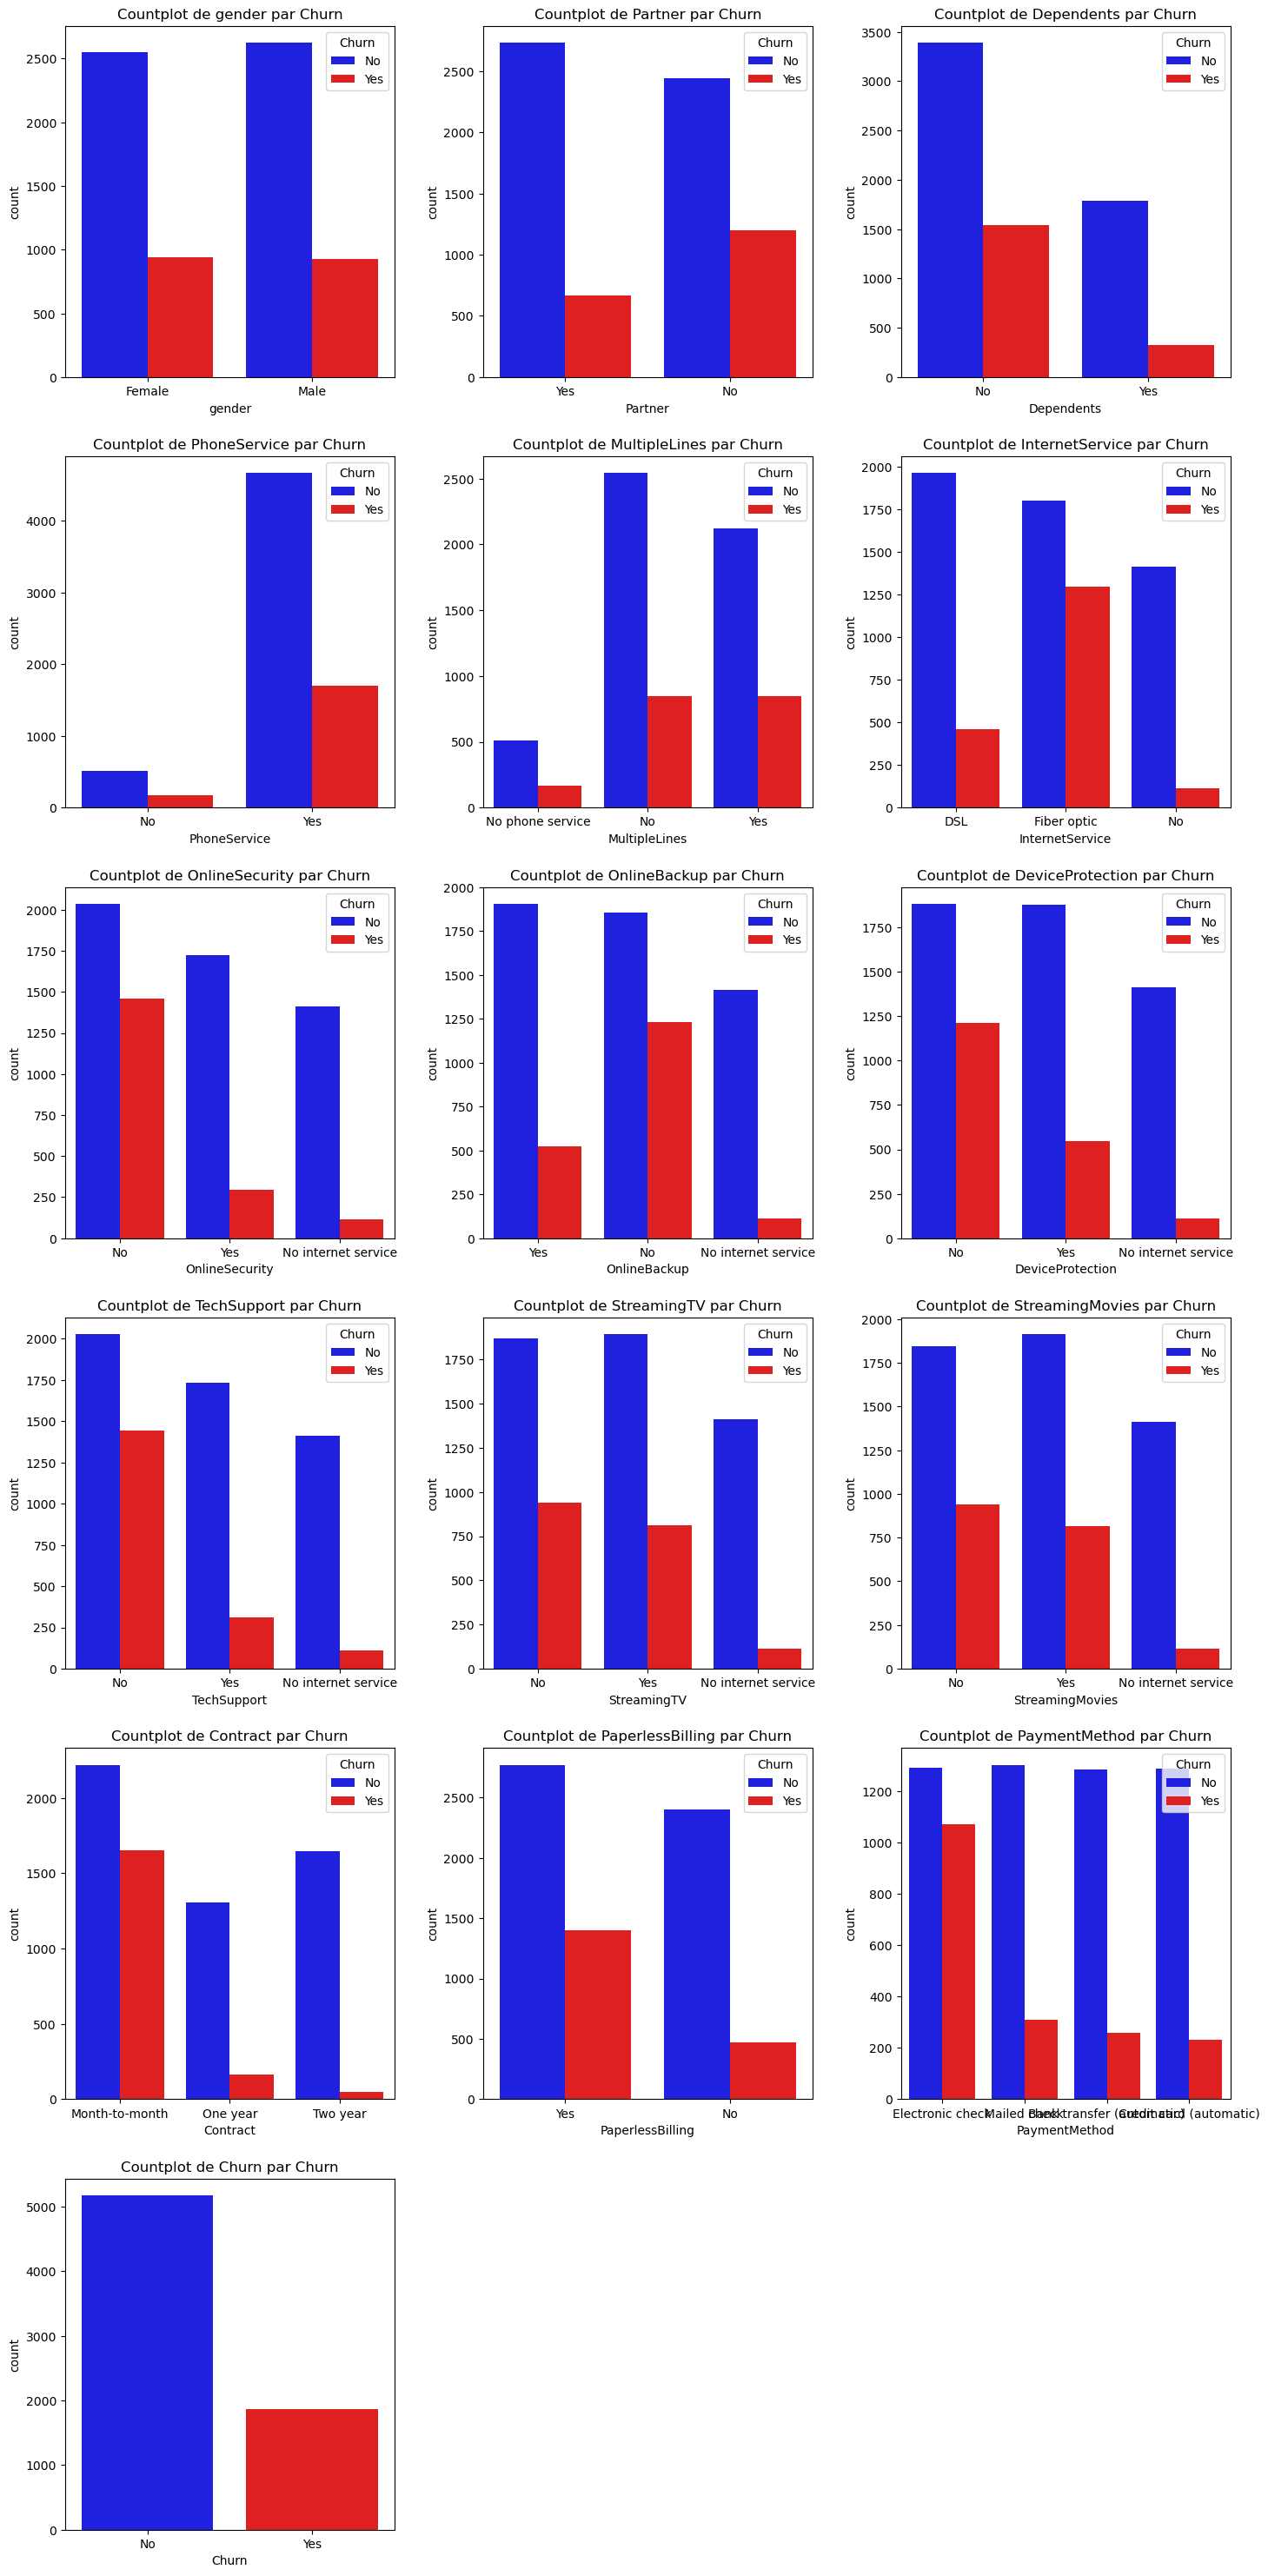

In [14]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O' and col != 'customerID']

plt.figure(figsize=(5 * cols, 5 * rows))

for i, col in enumerate(cat_cols):
    plt.subplot(rows, cols, i+1)
    sns.countplot(data=df, x=col, hue='Churn', palette=["blue", "red"]) 
    plt.title(f'Countplot de {col} par Churn')

plt.tight_layout(pad=2)
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

target = 'Churn'

categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
categorical_cols = [col for col in categorical_cols if col != target]
categorical_cols = categorical_cols[1:]  
# 2. Appliquer le test du Chi² pour chaque variable
chi2_results = []

for col in categorical_cols:
    contingency = pd.crosstab(df[col], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi2_results.append({
        'Variable': col,
        'Chi2 Stat': chi2,
        'p-value': p
    })

# 3. Afficher les résultats dans un DataFrame
chi2_df = pd.DataFrame(chi2_results).sort_values(by='p-value')
print(chi2_df)


            Variable    Chi2 Stat        p-value
12          Contract  1184.596572  5.863038e-258
6     OnlineSecurity   849.998968  2.661150e-185
9        TechSupport   828.197068  1.443084e-180
5    InternetService   732.309590  9.571788e-160
14     PaymentMethod   648.142327  3.682355e-140
7       OnlineBackup   601.812790  2.079759e-131
8   DeviceProtection   558.419369  5.505219e-122
11   StreamingMovies   375.661479   2.667757e-82
10       StreamingTV   374.203943   5.528994e-82
13  PaperlessBilling   258.277649   4.073355e-58
2         Dependents   189.129249   4.924922e-43
1            Partner   158.733382   2.139911e-36
4      MultipleLines    11.330441   3.464383e-03
3       PhoneService     0.915033   3.387825e-01
0             gender     0.484083   4.865787e-01


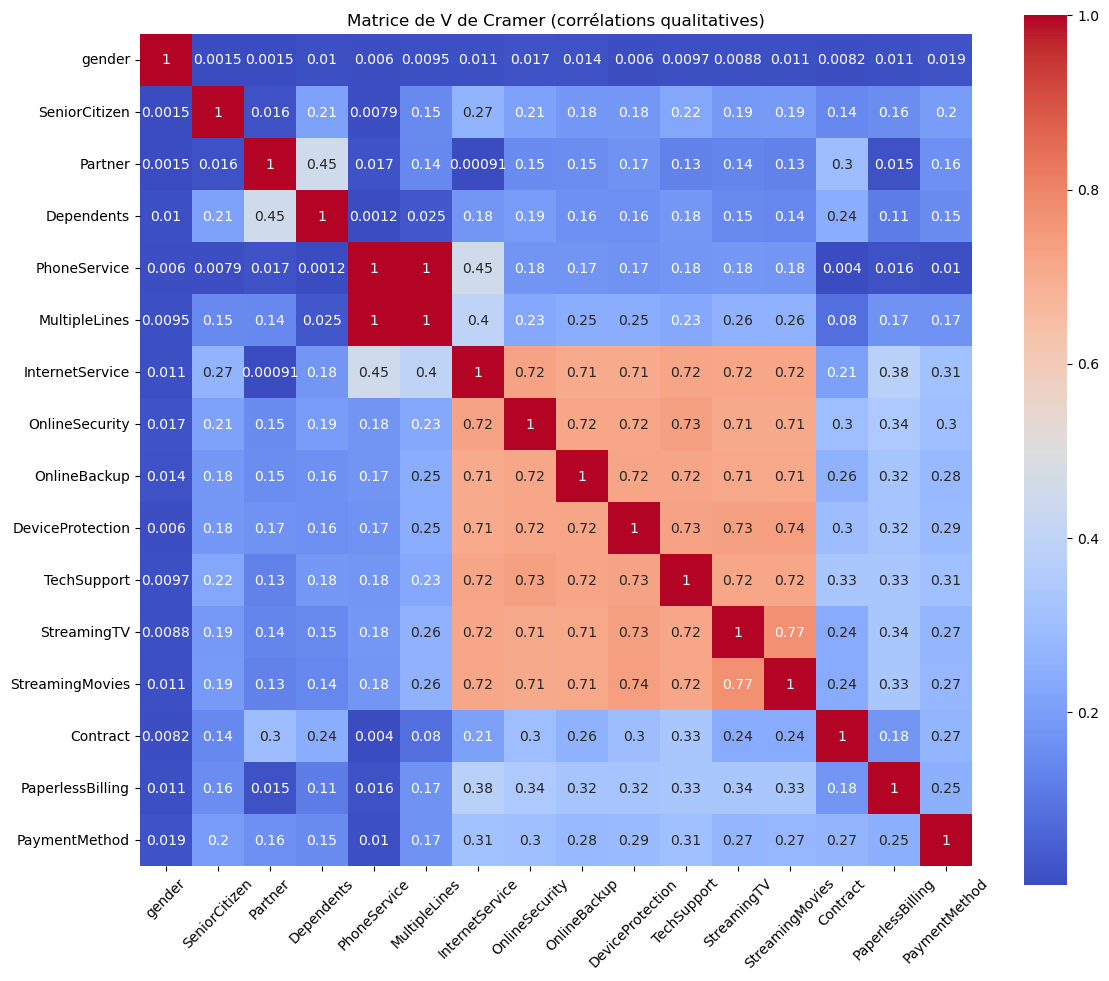

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    contingency = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency)[0]
    n = contingency.sum().sum()
    r, k = contingency.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cat_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']


matrix = pd.DataFrame(index=cat_vars, columns=cat_vars)

# Calcul V de Cramer pour chaque paire
for var1 in cat_vars:
    for var2 in cat_vars:
        if var1 == var2:
            matrix.loc[var1, var2] = 1.0
        else:
            matrix.loc[var1, var2] = cramers_v(df[var1], df[var2])


matrix = matrix.astype(float)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Matrice de V de Cramer (corrélations qualitatives)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("../reports/correlation_V_de_cramer.png", dpi=300, bbox_inches='tight')
plt.show()


In [17]:
testdf = df[["MultipleLines", "PhoneService"]]
testdf.replace("No phone service", "No", inplace=True)

C:\Users\GTR\AppData\Local\Temp\ipykernel_11000\2430349426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.replace("No phone service", "No", inplace=True)


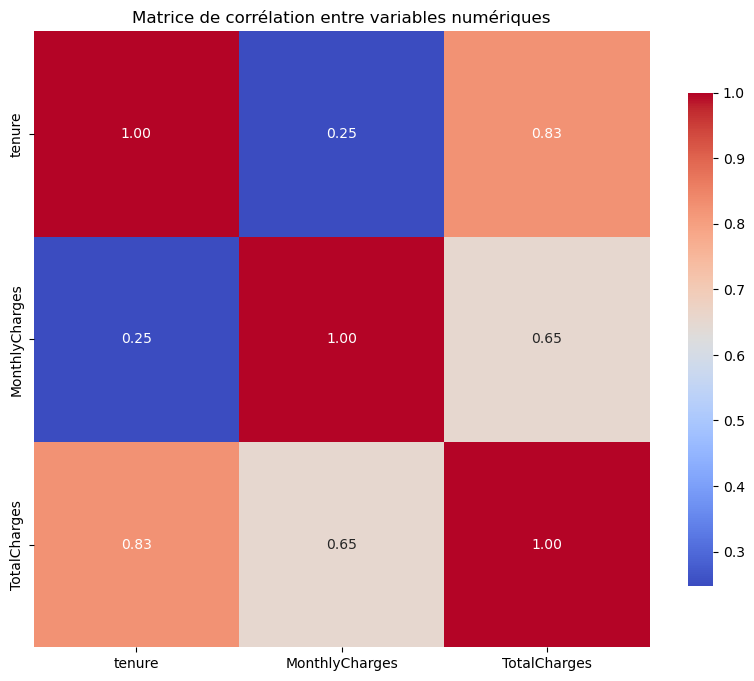

In [18]:
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Matrice de corrélation entre variables numériques")
plt.savefig("../reports/correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


# Observation :
on remarque que le service internet type fibre represente la majorité des churn <br>
on plus on remarque que les clients non inscrit dans des services en ligne comme (online security, online backup, Device protection) et la meme chose pour les clients qui ne benificié pas d'un tech support, est comme c'est client sans pas attacher a des service de operateur augmente la probabilité de resilié le contrat.<br>
aussi le type de contrat joue un role important sur la decision des clients de resielier le contrat ou on remarque plus 80% churn ont des contrats de type mensuelle <br>
jusqu au 85% des clients qui utilise le check electronique on resilié leur contrat.

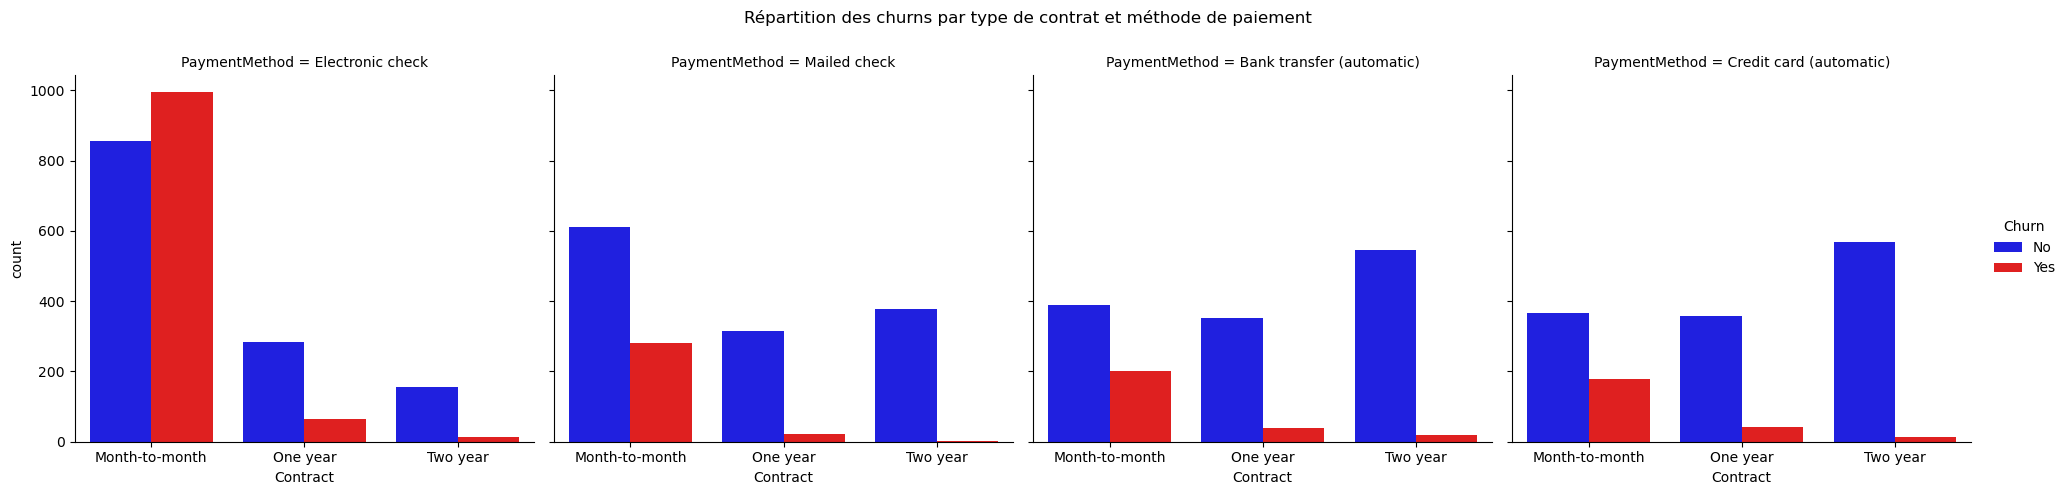

In [19]:
sns.catplot(x='Contract', hue='Churn', col='PaymentMethod', kind='count', data=df, palette=["blue", "red"])
plt.suptitle("Répartition des churns par type de contrat et méthode de paiement")
plt.subplots_adjust(top=0.85)
plt.savefig("../reports/churn_rate_by_contract_and_payment.png")
plt.show()

Observation
Les clients avec des contrats mensuels qui paient par chèque électronique ont un taux de désabonnement beaucoup plus élevé que les autres groupes.

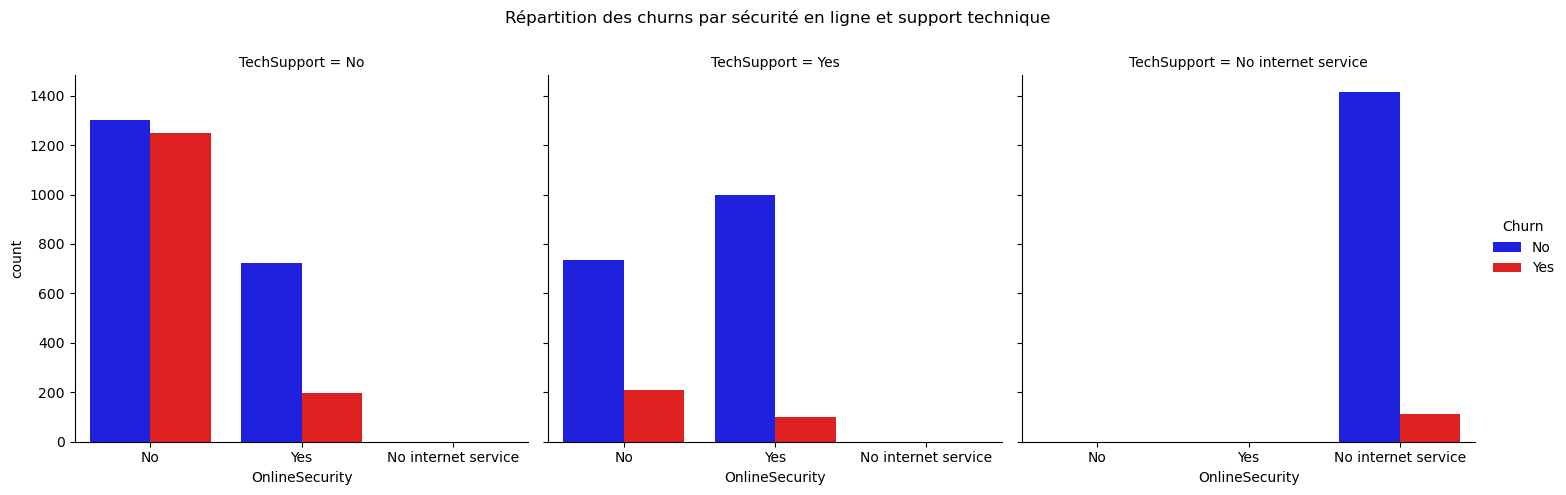

In [20]:
sns.catplot(x='OnlineSecurity', hue='Churn', col='TechSupport', kind='count', data=df, palette=["blue", "red"])
plt.suptitle("Répartition des churns par sécurité en ligne et support technique")
plt.subplots_adjust(top=0.85)
plt.savefig("../reports/churn_rate_by_security_and_support.png")
plt.show()

# Observation
The customer with no online security and with no techsupport have higher churn rate than others

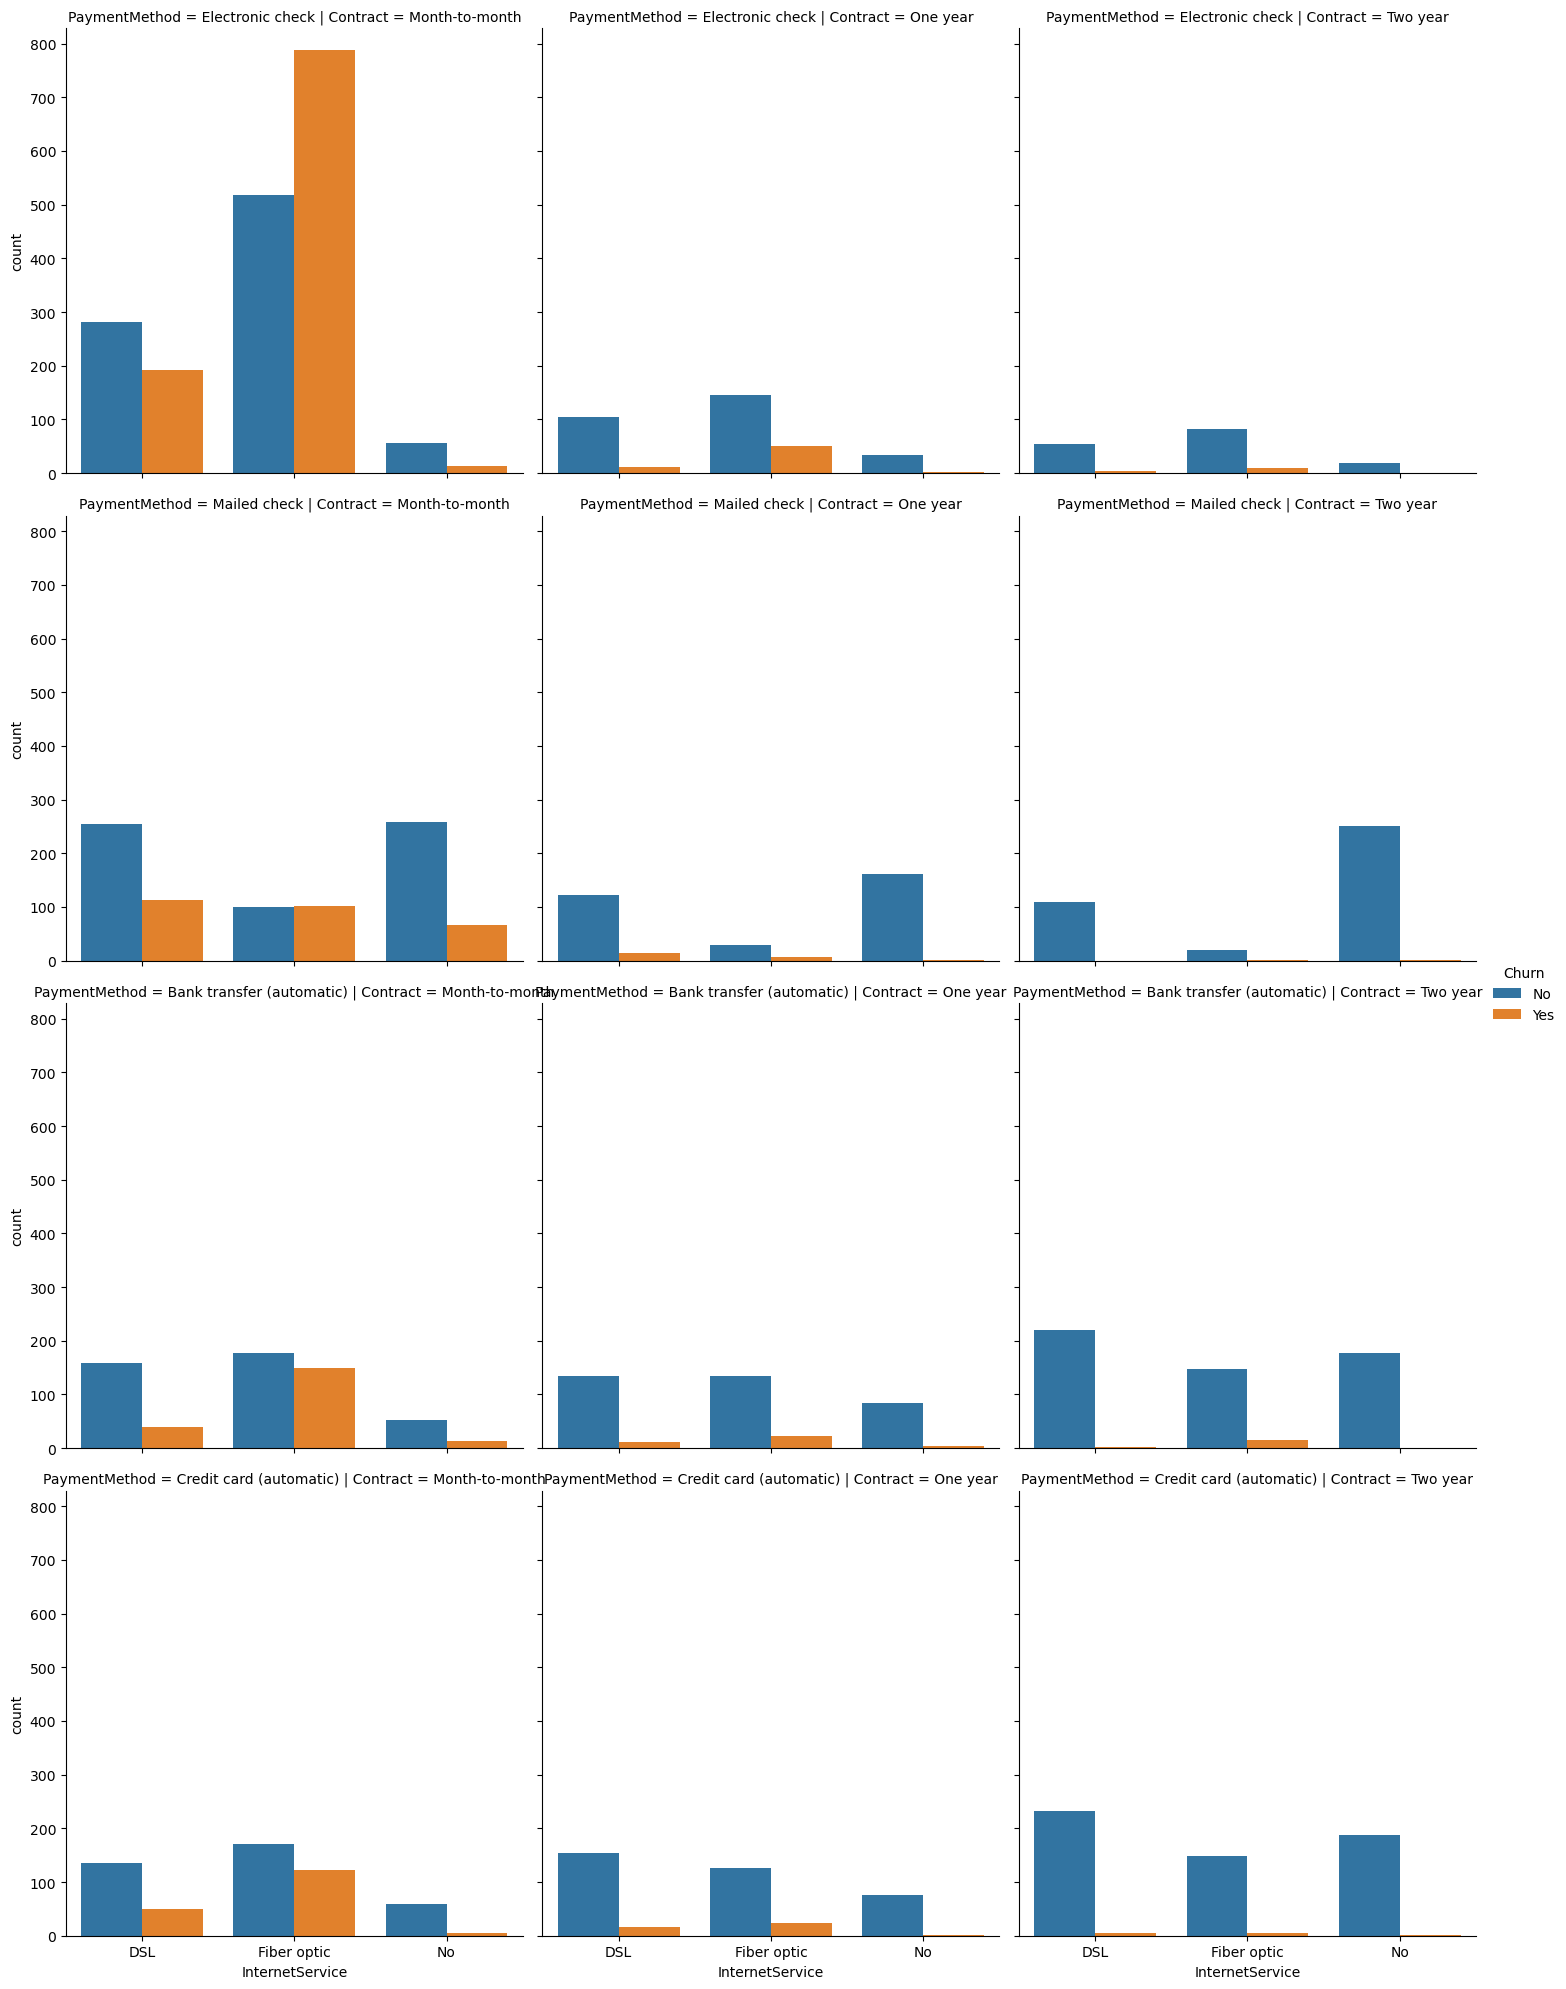

In [21]:
sns.catplot(x='InternetService', hue='Churn', col='Contract', row='PaymentMethod', kind='count', data=df)
plt.show()

# Observation
The customer with fiber optic connection who have month to month contract and pays using electronic check or mailed check have higher churn rate than others¶

In [22]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: >

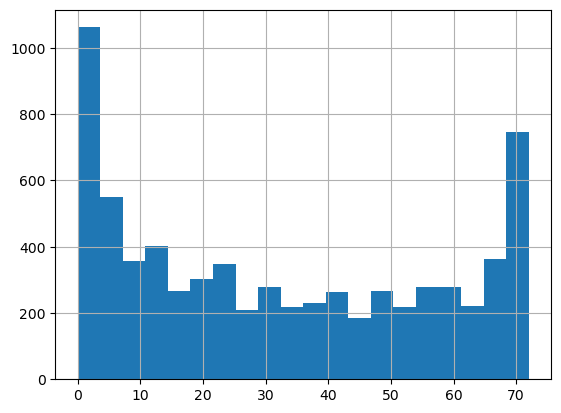

In [23]:
df["tenure"].hist(bins=20)

<Axes: >

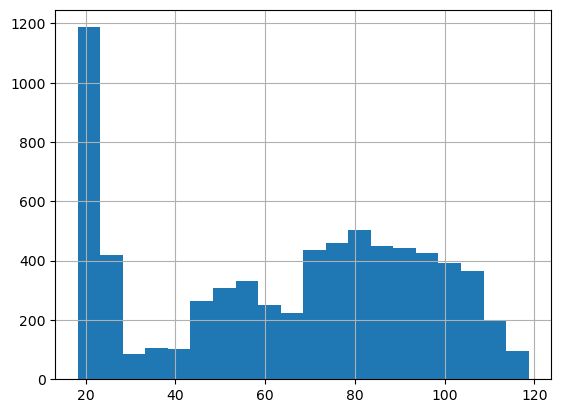

In [24]:
df["MonthlyCharges"].hist(bins=20)

<Axes: >

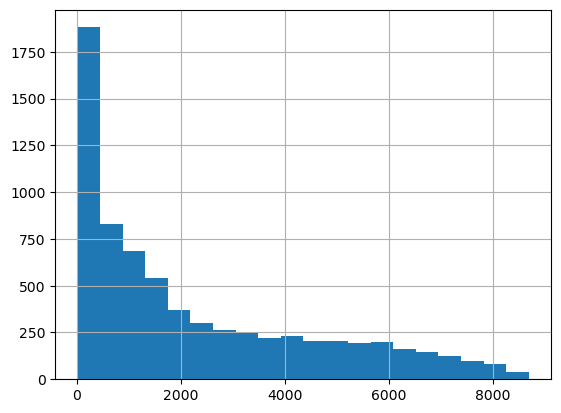

In [25]:
df["TotalCharges"].hist(bins=20)